In [ ]:
#!pip install yfinance

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

%matplotlib inline
plt.style.use('seaborn-darkgrid')

**1) Extracting S&P 500 Stock List** <br>
Source from wikipedia

In [7]:
#source from wiki
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

SP500_full = pd.read_html(url)[0]

In [8]:
SP500_full.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [11]:
#Extracting only the ticker list
SP500_ticker = SP500_full['Symbol'].tolist()

In [12]:
#parsing tickers to list, remove special characters
SP500_ticker = [ticker.replace(".","-") for ticker in SP500_ticker]

**2) Retrieving Historic Data** <br>

In [20]:
tickers = ['UL', 'PG', 'CL', 'KMB']

In [21]:
price_data = yf.download(tickers, start="2022-01-02")['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [22]:
price_data.head()

,CL,KMB,PG,UL
Date,,,,
2022-01-03,84.132973,142.429993,162.025360,53.549469
2022-01-04,84.411469,143.199997,162.592316,53.291924
2022-01-05,84.759575,144.059998,163.328339,53.192867
2022-01-06,84.202599,143.119995,161.955750,52.667870
2022-01-07,83.983788,143.740005,161.866226,53.291924


**3) Plotting - Same Size Comparison** <br>
For visualising the price of different assets, to make them comparable,  divide the entire price series by its respective first price value. This will make the changes comparable. 

Hence, one way is to divide it by the first price so that we can compare them on the same scale. This helps us to compare stocks with different price basis.

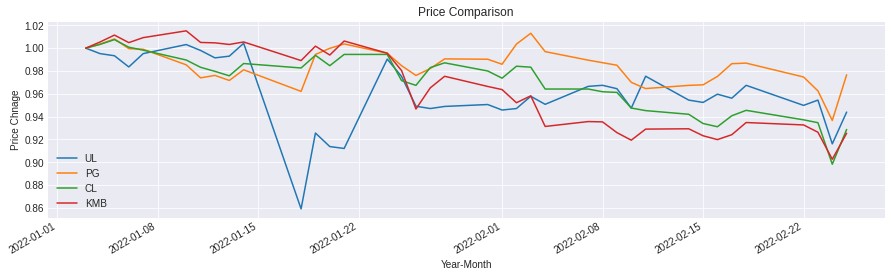

In [28]:
# Plot the absolute price series
plt.figure(figsize=(15,4))
(price_data['UL']/price_data['UL'].iloc[0]).plot()
(price_data['PG']/price_data['PG'].iloc[0]).plot()
(price_data['CL']/price_data['CL'].iloc[0]).plot()
(price_data['KMB']/price_data['KMB'].iloc[0]).plot()

# Set the title and axes label
plt.title('Price Comparison', fontsize=12)
plt.xlabel('Year-Month', fontsize=10)
plt.ylabel('Price Chnage', fontsize=10)
plt.legend()
plt.show()

**4) Working with Minute Intervals/ Re-sampling to Hour or Day** <br>
With resampling technique to aggregate. Only high frequency data can be aggregated into Hourly/ Daily data

In [29]:
# UVXY intraday trend
UVXY = yf.download('UVXY', period='5d', interval='1m', auto_adjust=True)
UVXY.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2022-02-18 09:30:00-05:00,16.6600,16.74,16.639999,16.680000,3848426
2022-02-18 09:31:00-05:00,16.6700,16.73,16.531000,16.660000,338119
2022-02-18 09:32:00-05:00,16.6500,16.67,16.589800,16.670000,293449
2022-02-18 09:33:00-05:00,16.6700,16.90,16.660000,16.879999,1084198
2022-02-18 09:34:00-05:00,16.8806,17.01,16.820000,17.010000,492703


Define conversion logic with dictionary. 

In [30]:
# Aggregate function
conv_dict = {'Open': 'first',
              'High': 'max',
              'Low': 'min',
              'Close': 'last',
              'Volume': 'sum'
             }

In [31]:
# Resample data to 15 minutes data
UVXY_15min = UVXY.resample('15T').agg(conv_dict)
UVXY_15min.dropna(inplace=True)
UVXY_15min.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2022-02-18 09:30:00-05:00,16.660000,17.170000,16.531000,17.105000,9641957
2022-02-18 09:45:00-05:00,17.100000,17.139999,16.309999,16.410000,5382373
2022-02-18 10:00:00-05:00,16.410000,16.879999,16.379999,16.705000,4027740
2022-02-18 10:15:00-05:00,16.709999,16.980000,16.490000,16.899000,3967804
2022-02-18 10:30:00-05:00,16.895000,17.219999,16.889999,16.995001,4450372


**5) Retrieving FOREX Data** <br>
From yahoo finance with yfinance package. e.g. EUR/USD forex data, parse `EURUSD=X` as the ticker. Reference - [Yahoo! Finance](https://finance.yahoo.com/currencies/).

In [32]:
# Set the ticker
forex_data = yf.download('GBPHKD=X', start='2022-01-01')
forex_data.index = pd.to_datetime(forex_data.index)
forex_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,10.54051,10.54915,10.47379,10.54087,10.54087,0
2022-01-04,10.51204,10.56532,10.49180,10.51275,10.51275,0
2022-01-05,10.54381,10.58040,10.53760,10.54412,10.54412,0
2022-01-06,10.56544,10.57556,10.52349,10.56470,10.56470,0
2022-01-07,10.55670,10.59113,10.55346,10.55611,10.55611,0


**6) Plotting FOREX Chart down to minute data**

In [33]:
# Set the ticker as 'EURUSD=X'
forex_data_minute = yf.download('EURUSD=X', period='5d', interval='1m')

# Set the index to a datetime object
forex_data_minute.index = pd.to_datetime(forex_data_minute.index)
forex_data_minute.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-02-21 00:00:00+00:00,1.131862,1.131862,1.131862,1.131862,1.131862,0
2022-02-21 00:01:00+00:00,1.131862,1.131862,1.131862,1.131862,1.131862,0
2022-02-21 00:02:00+00:00,1.131734,1.131734,1.131734,1.131734,1.131734,0
2022-02-21 00:03:00+00:00,1.131990,1.131990,1.131990,1.131990,1.131990,0
2022-02-21 00:04:00+00:00,1.131862,1.131862,1.131862,1.131862,1.131862,0


In [34]:
# define function to format x-label of graph
def format_xlabels(data, ax):
    num_x_values = data.shape[0]
    step_size = num_x_values // 4    

    ax.set_xticks(np.arange(num_x_values))
    ax.set_xticklabels(data.index.values, rotation=45)
   
    for i, label in enumerate(ax.get_xticklabels()):
        if not i%step_size==0:
            label.set_visible(False)  
    label.set_visible(True)

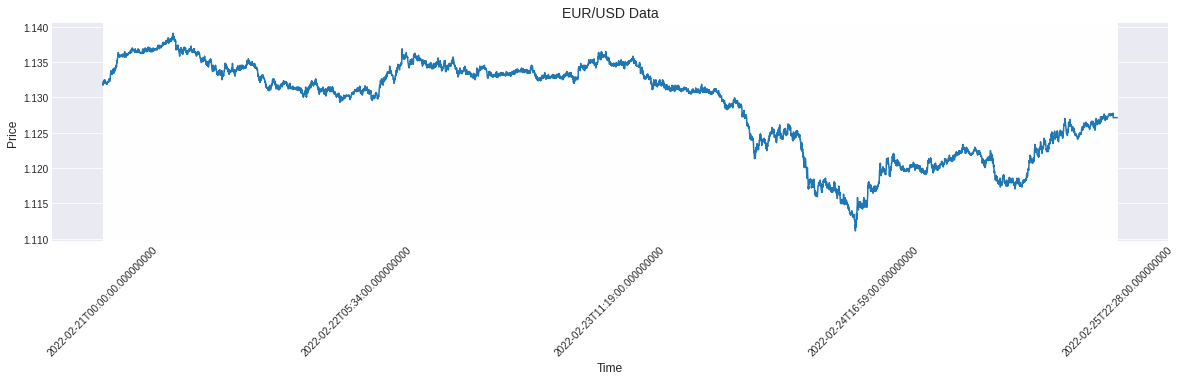

In [37]:
# Number of points to plot
x_values = forex_data_minute['Adj Close'].shape[0]

# Plot the series
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(range(x_values), forex_data_minute['Adj Close'])

# Set title and axis label
plt.title('EUR/USD Data', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Format the xlabel
format_xlabels(forex_data_minute['Adj Close'], ax)

# Show the plot
plt.show()

**7) Retrieving Futures Data** <br>
https://finance.yahoo.com/lookup/ 

In [38]:
# Gold Apr 22 future (GC=F)
goldapr22 = yf.download('GC=F', start='2022-01-01', end='2022-02-27')

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Price in USD')

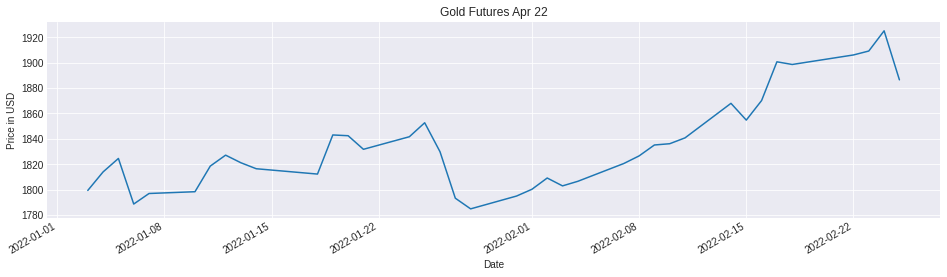

In [40]:
# Plot the adjusted close price
(goldapr22['Adj Close']).plot(figsize=(16, 4))
plt.title('Gold Futures Apr 22')
plt.ylabel('Price in USD')

**8) Working with Option Chains**

In [41]:
# identifying option dates available for a ticker
UVXY = yf.Ticker('UVXY')

# Call the options on the ticker to get available expiry dates
UVXY.options

('2022-03-04',
 '2022-03-11',
 '2022-03-18',
 '2022-03-25',
 '2022-04-01',
 '2022-04-14',
 '2022-05-20',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-02-17',
 '2024-01-19')

In [48]:
# retrieving option chain data
uvxy_option_chain = UVXY.option_chain(date=UVXY.options[0])

# add calls/puts to make sure right data is retrieved
uvxy_option_chain.puts.tail( )

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
40,UVXY220304P00031000,2022-02-24 17:15:35+00:00,31.0,11.23,13.15,16.05,0.000000,0.000000,20,72,5.359378,True,REGULAR,USD
41,UVXY220304P00032000,2022-02-25 16:02:31+00:00,32.0,15.35,14.50,16.55,-1.799999,-10.495623,50,6,4.738285,True,REGULAR,USD
42,UVXY220304P00034000,2022-02-17 20:12:17+00:00,34.0,18.40,16.30,18.60,0.000000,0.000000,8,255,5.074222,True,REGULAR,USD
43,UVXY220304P00035000,2022-02-25 20:52:14+00:00,35.0,18.55,18.25,19.20,1.349999,7.848828,19,33,3.070315,True,REGULAR,USD
44,UVXY220304P00040000,2022-02-25 20:37:26+00:00,40.0,23.62,22.05,24.45,4.400002,22.892828,2,5,5.457034,True,REGULAR,USD


Text(0, 0.5, 'Last Price')

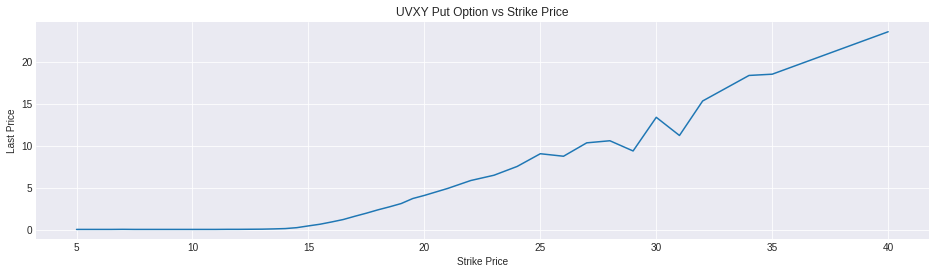

In [49]:
# Plot call strike price vs put last traded price 
plt.figure(figsize=(16, 4))
plt.plot(option_chain.puts.strike, option_chain.puts.lastPrice)
plt.title('UVXY Put Option vs Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Last Price')